# 准备数据

In [1]:
# 过滤Alphalens的warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# 加载模块
import polars as pl

from vnpy.trader.constant import Interval

from vnpy.alpha import AlphaLab

In [3]:
# 创建数据中心
lab: AlphaLab = AlphaLab("./lab/csi300")

In [4]:
# 设置任务参数
name = "300_lasso"
index_symbol: str = "000300.SSE"
start: str = "2008-01-01"
end: str = "2023-12-31"
interval: Interval = Interval.DAILY
extended_days: int = 100

In [5]:
# 加载所有成分股代码
component_symbols: list[str] = lab.load_component_symbols(index_symbol, start, end)

# 特征计算

In [6]:
# 加载模块
from functools import partial

from vnpy.trader.constant import Interval

from vnpy.alpha.dataset import (
    AlphaDataset,
    process_drop_na,
    process_cs_norm,
    process_fill_na
)
from vnpy.alpha.dataset.datasets.alpha_158 import Alpha158

In [7]:
# 加载成分股数据
df: pl.DataFrame = lab.load_bar_df(component_symbols, interval, start, end, extended_days)

In [8]:
df

shape: (2_668_723, 10)
┌────────────┬──────────┬──────────┬──────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ datetime   ┆ open     ┆ high     ┆ low      ┆ … ┆ turnover   ┆ open_inte ┆ vwap      ┆ vt_symbol │
│ ---        ┆ ---      ┆ ---      ┆ ---      ┆   ┆ ---        ┆ rest      ┆ ---       ┆ ---       │
│ datetime[μ ┆ f32      ┆ f32      ┆ f32      ┆   ┆ f32        ┆ ---       ┆ f32       ┆ str       │
│ s]         ┆          ┆          ┆          ┆   ┆            ┆ f32       ┆           ┆           │
╞════════════╪══════════╪══════════╪══════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 2007-09-24 ┆ 1.037444 ┆ 1.037912 ┆ 0.961139 ┆ … ┆ 4.5870144e ┆ 0.0       ┆ 20.894516 ┆ 000800.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 8          ┆           ┆           ┆ SE        │
│ 2007-09-25 ┆ 0.995263 ┆ 1.051186 ┆ 0.981041 ┆ … ┆ 3.10620608 ┆ 0.0       ┆ 21.369392 ┆ 000800.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ e8         ┆           ┆           ┆ SE        │
│ 2007-09-26 ┆ 1.006634 ┆ 1.016113 ┆ 0.941232 ┆ … ┆ 3.04387264 ┆ 0.0       ┆ 20.580164 ┆ 000800.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ e8         ┆           ┆           ┆ SE        │
│ 2007-09-27 ┆ 0.970619 ┆ 0.984835 ┆ 0.943129 ┆ … ┆ 1.8346296e ┆ 0.0       ┆ 20.406477 ┆ 000800.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ 8          ┆           ┆           ┆ SE        │
│ 2007-09-28 ┆ 0.981041 ┆ 1.02749  ┆ 0.981041 ┆ … ┆ 3.42195424 ┆ 0.0       ┆ 21.421982 ┆ 000800.SZ │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ e8         ┆           ┆           ┆ SE        │
│ …          ┆ …        ┆ …        ┆ …        ┆ … ┆ …          ┆ …         ┆ …         ┆ …         │
│ 2024-01-04 ┆ 5.412005 ┆ 5.525325 ┆ 5.368685 ┆ … ┆ 3.93983904 ┆ 0.0       ┆ 16.386223 ┆ 600160.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ e8         ┆           ┆           ┆ E         │
│ 2024-01-05 ┆ 5.492015 ┆ 5.778581 ┆ 5.482006 ┆ … ┆ 5.41574144 ┆ 0.0       ┆ 16.920534 ┆ 600160.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ e8         ┆           ┆           ┆ E         │
│ 2024-01-08 ┆ 5.658632 ┆ 5.671956 ┆ 5.53865  ┆ … ┆ 5.16362272 ┆ 0.0       ┆ 16.844635 ┆ 600160.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ e8         ┆           ┆           ┆ E         │
│ 2024-01-09 ┆ 5.578655 ┆ 5.615313 ┆ 5.375347 ┆ … ┆ 3.80037792 ┆ 0.0       ┆ 16.454468 ┆ 600160.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ e8         ┆           ┆           ┆ E         │
│ 2024-01-10 ┆ 5.372033 ┆ 5.448662 ┆ 5.275384 ┆ … ┆ 2.46808288 ┆ 0.0       ┆ 16.076876 ┆ 600160.SS │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ e8         ┆           ┆           ┆ E         │
└────────────┴──────────┴──────────┴──────────┴───┴────────────┴───────────┴───────────┴───────────┘

In [9]:
# 创建数据集对象
dataset: AlphaDataset = Alpha158(
    df,
    train_period = ("2008-01-01", "2014-12-31"),
    valid_period = ("2015-01-01", "2016-12-31"),
    test_period = ("2017-01-01", "2020-8-31"),
)

In [10]:
# 添加数据预处理器
dataset.add_processor("learn", partial(process_drop_na, names=["label"]))
dataset.add_processor("learn", partial(process_cs_norm, names=["label"], method="zscore"))

dataset.add_processor("infer", partial(process_fill_na, fill_value=0))

In [11]:
# 收集指数成分过滤器
filters: dict[str, list[str]] = lab.load_component_filters(index_symbol, start, end)

In [ ]:
# 准备特征和标签数据
# dataset.prepare_data(filters, max_workers=8)

2025-07-22 16:50:30 开始计算表达式因子特征


100%|██████████| 159/159 [1:19:22<00:00, 29.95s/it]  

2025-07-22 18:09:53 开始合并结果数据因子特征



0it [00:00, ?it/s]


2025-07-22 18:09:53 开始筛选成分股数据


100%|██████████| 819/819 [00:12<00:00, 64.34it/s] 


Dropped 7.9% entries from factor data: 0.4% in forward returns computation and 7.5% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


min       max      mean       std   count    count %
factor_quantile                                                           
1.0              0.000000  0.783112  0.092955  0.131673  184949  10.066775
2.0              0.000571  0.849006  0.241236  0.181801  183716   9.999663
3.0              0.010751  0.886908  0.321495  0.204981  183114   9.966896
4.0              0.016062  0.914302  0.388077  0.216530  183642   9.995635
5.0              0.027016  0.936739  0.450759  0.221084  183948  10.012290
6.0              0.047668  0.954686  0.514231  0.219328  182905   9.955520
7.0              0.071943  0.967680  0.581942  0.210957  183341   9.979251
8.0              0.101998  0.980325  0.659181  0.193256  183396   9.982245
9.0              0.148624  0.998517  0.752254  0.162710  183430   9.984096
10.0             0.234618  1.000000  0.888934  0.113950  184781  10.057630

Returns Analysis


1D     5D    10D
Ann. alpha                                      0.100 -0.035 -0.002
beta                                            0.024  0.024  0.032
Mean Period Wise Return Top Quantile (bps)     15.216  2.036  3.604
Mean Period Wise Return Bottom Quantile (bps)  -4.978  0.335  1.358
Mean Period Wise Spread (bps)                  20.194  1.716  2.422

<Figure size 640x480 with 0 Axes>

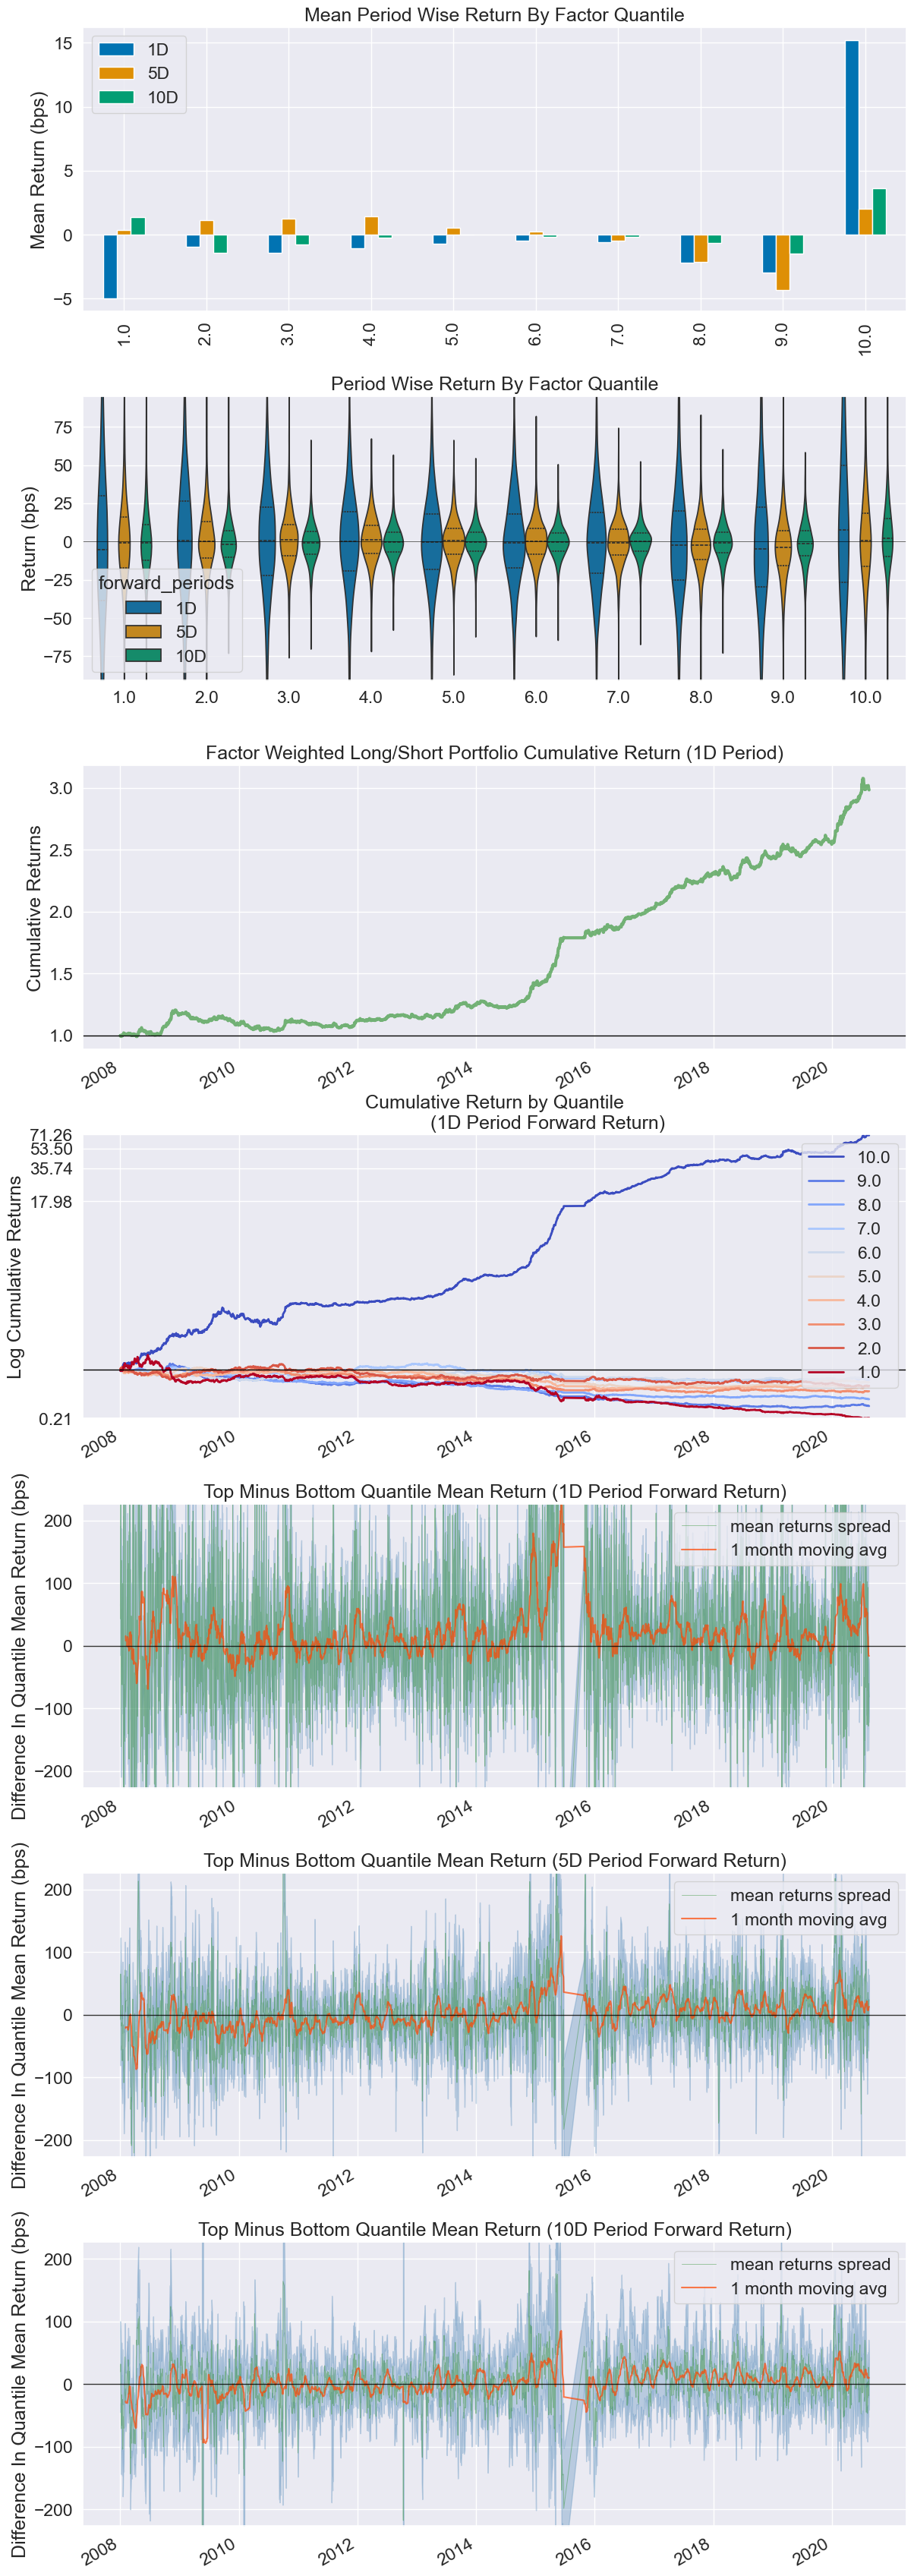

Information Analysis


1D     5D    10D
IC Mean          -0.029 -0.031 -0.005
IC Std.           0.137  0.129  0.128
Risk-Adjusted IC -0.209 -0.237 -0.038
t-stat(IC)          NaN    NaN    NaN
p-value(IC)         NaN    NaN    NaN
IC Skew             NaN    NaN    NaN
IC Kurtosis         NaN    NaN    NaN

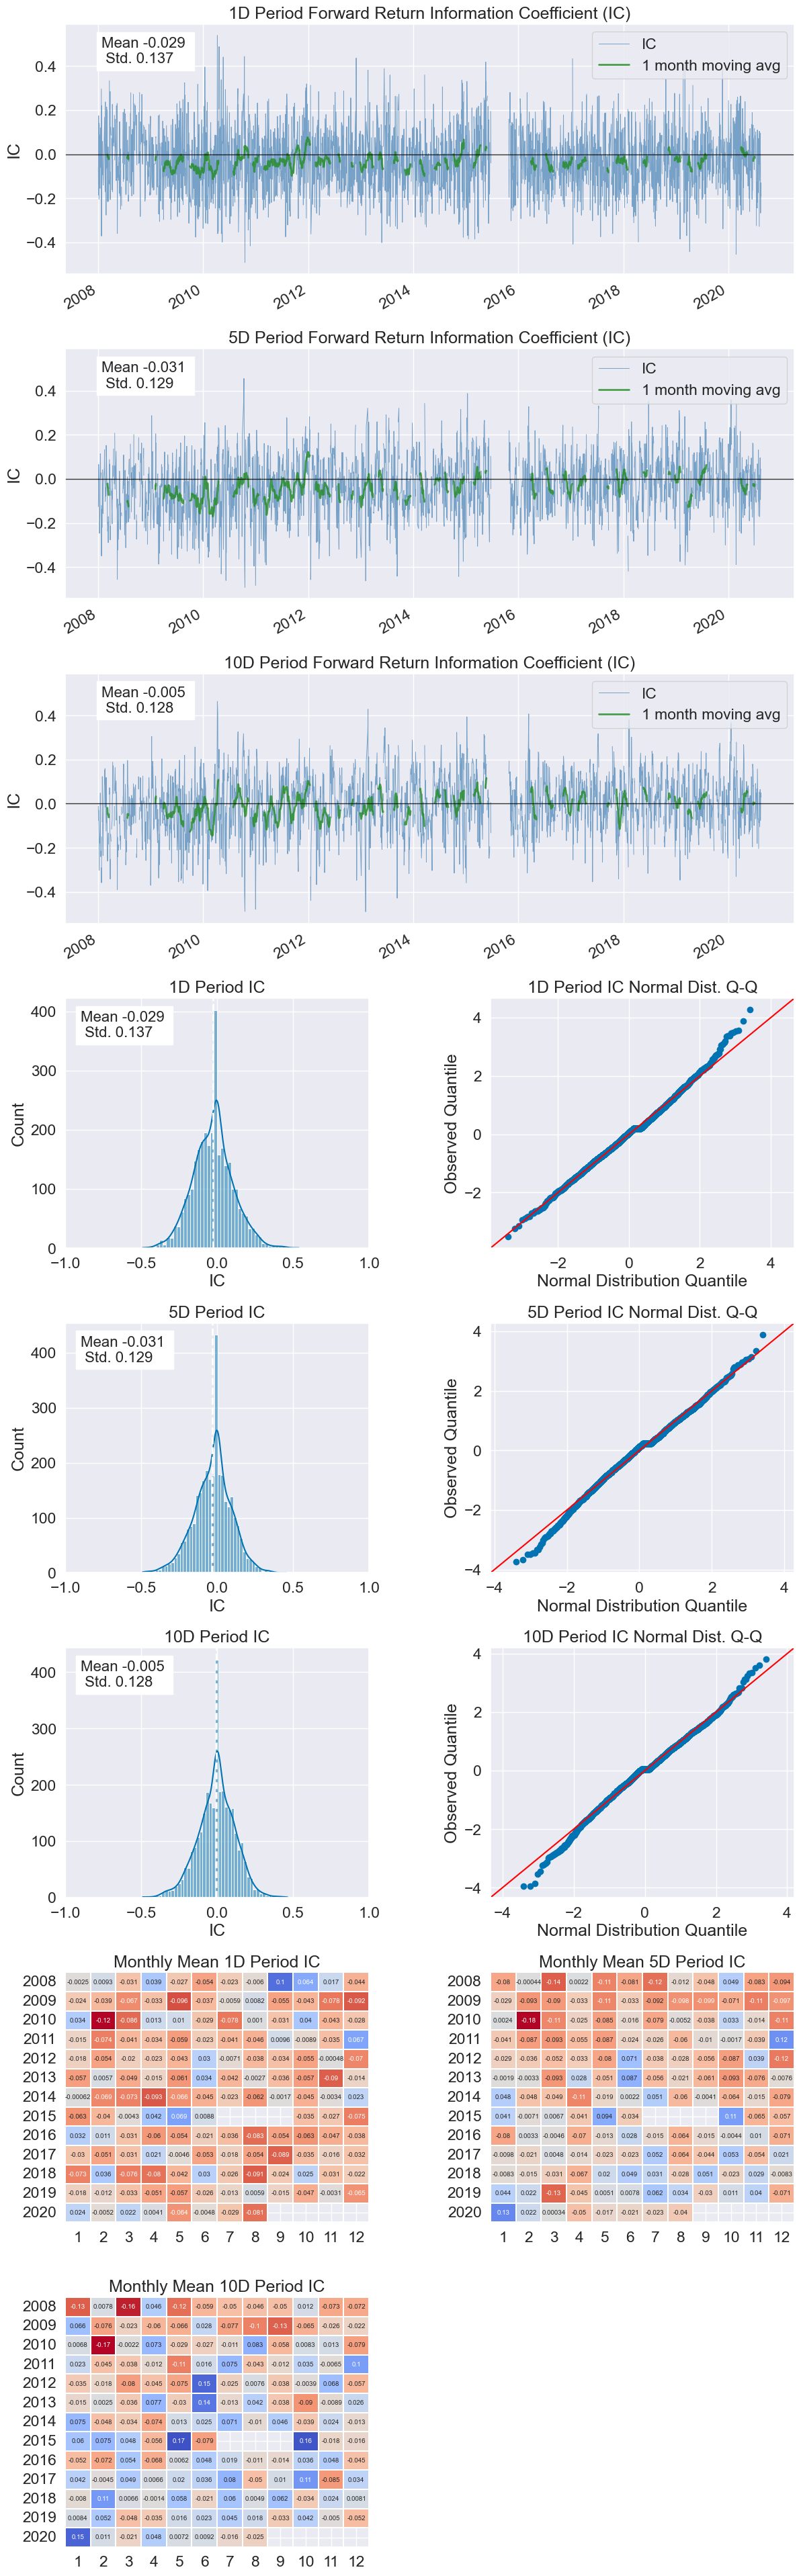

C:\Users\11986\AppData\Roaming\Python\Python312\site-packages\alphalens\utils.py:928: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


1D     5D    10D
Quantile 1.0 Mean Turnover    0.470  0.660  0.674
Quantile 2.0 Mean Turnover    0.752  0.906  0.892
Quantile 3.0 Mean Turnover    0.818  0.899  0.894
Quantile 4.0 Mean Turnover    0.845  0.894  0.893
Quantile 5.0 Mean Turnover    0.856  0.891  0.893
Quantile 6.0 Mean Turnover    0.860  0.896  0.895
Quantile 7.0 Mean Turnover    0.853  0.897  0.898
Quantile 8.0 Mean Turnover    0.835  0.899  0.896
Quantile 9.0 Mean Turnover    0.794  0.901  0.892
Quantile 10.0 Mean Turnover   0.673  0.893  0.885

1D     5D    10D
Mean Factor Rank Autocorrelation  0.605  0.038  0.083

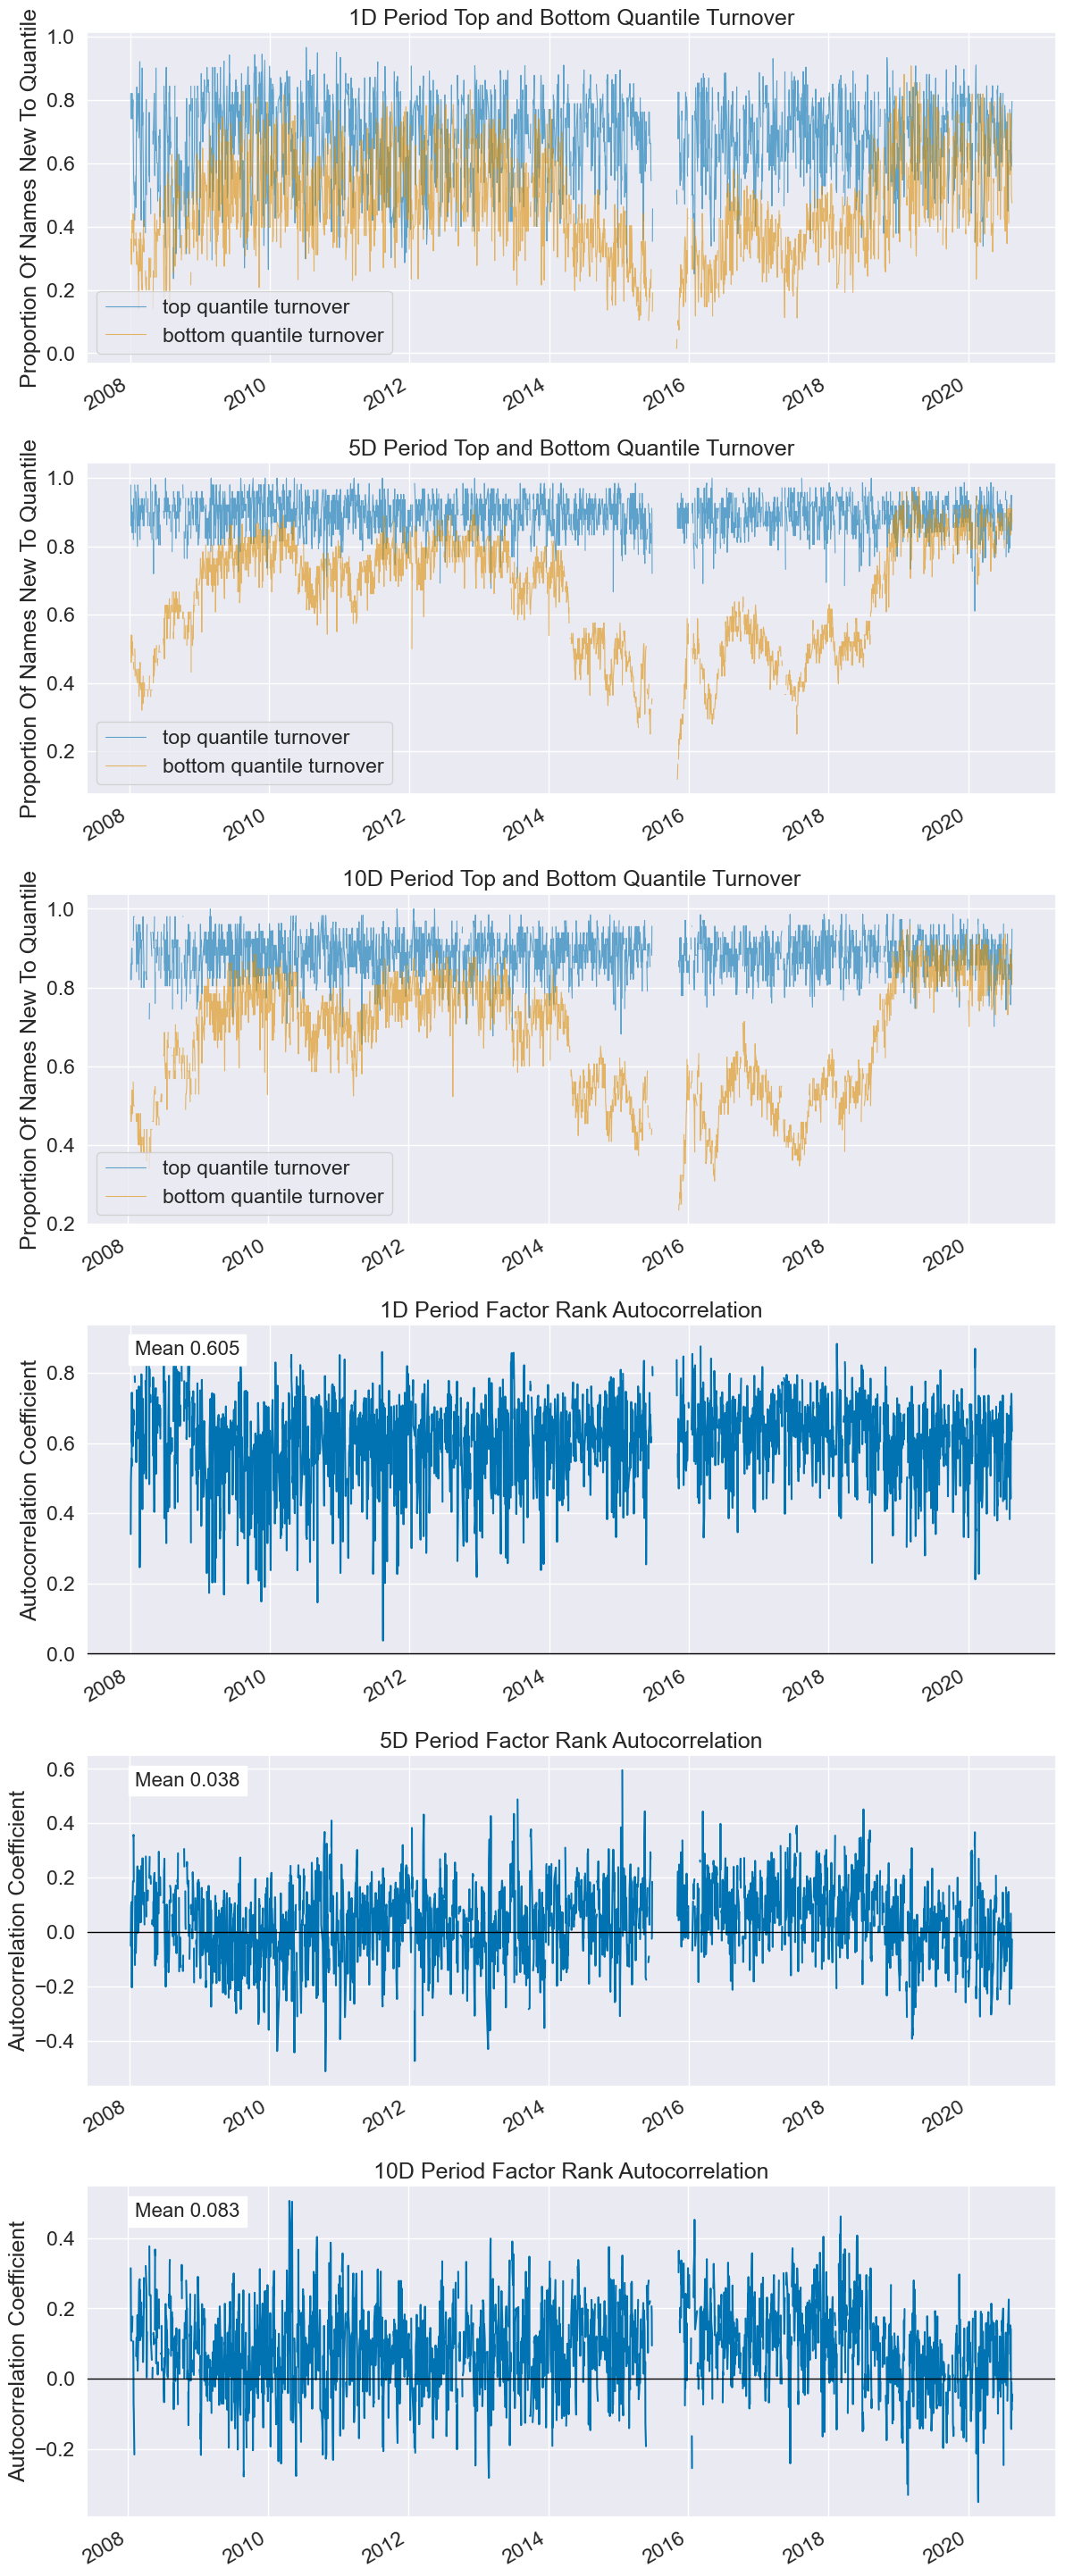

In [15]:
# 特征表现分析
dataset.show_feature_performance("rsv_5")

In [ ]:
# 保存到文件缓存
# lab.save_dataset(name, dataset)

# 模型训练

In [12]:
# 加载模块
import numpy as np

from vnpy.alpha import Segment, AlphaDataset, AlphaModel

from vnpy.alpha.model.models.lasso_model import LassoModel

In [13]:
# 从文件缓存加载
dataset: AlphaDataset = lab.load_dataset(name)

In [14]:
# 创建模型对象
model: AlphaModel = LassoModel()

In [16]:
# 使用数据集训练模型
model.fit(dataset)

d:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.266e+05, tolerance: 6.548e+01
  model = cd_fast.enet_coordinate_descent(


In [17]:
# 查看模型细节
model.detail()

2025-07-24 23:20:21 LASSO模型特征总数量: 35
2025-07-24 23:20:21 roc_30: 0.196728
2025-07-24 23:20:21 ma_5: -0.125446
2025-07-24 23:20:21 rsv_30: 0.086811
2025-07-24 23:20:21 rank_10: -0.074959
2025-07-24 23:20:21 klow_2: -0.068978
2025-07-24 23:20:21 rank_5: -0.043288
2025-07-24 23:20:21 rsv_20: 0.039772
2025-07-24 23:20:21 imxd_5: -0.035768
2025-07-24 23:20:21 qtld_5: -0.035549
2025-07-24 23:20:21 rank_60: 0.034922
2025-07-24 23:20:21 max_60: 0.033504
2025-07-24 23:20:21 imax_30: -0.028222
2025-07-24 23:20:21 rsqr_5: -0.027012
2025-07-24 23:20:21 sumd_30: 0.025165
2025-07-24 23:20:21 rsqr_10: -0.021564
2025-07-24 23:20:21 rsv_10: 0.019431
2025-07-24 23:20:21 ksft_2: -0.017219
2025-07-24 23:20:21 wvma_30: -0.013255
2025-07-24 23:20:21 rsqr_30: -0.011485
2025-07-24 23:20:21 wvma_60: -0.010871
2025-07-24 23:20:21 imin_10: 0.010546
2025-07-24 23:20:21 imxd_60: 0.009155
2025-07-24 23:20:21 wvma_20: -0.008455
2025-07-24 23:20:21 imin_5: 0.006776
2025-07-24 23:20:21 sumd_10: 0.006191
2025-07-24 23:

In [18]:
# 保存模型
lab.save_model(name, model)

# 预测信号

In [20]:
model: AlphaModel = lab.load_model(name)

In [21]:
# 用模型在测试集上预测
pre: np.ndarray = model.predict(dataset, Segment.TEST)

# 加载测试集数据
df_t: pl.DataFrame = dataset.fetch_infer(Segment.TEST)

# 合并预测信号列
df_t = df_t.with_columns(pl.Series(pre).alias("signal"))

# 提取信号数据
signal: pl.DataFrame = df_t["datetime", "vt_symbol", "signal"]

Dropped 1.1% entries from factor data: 1.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
Quantiles Statistics


min       max      mean       std  count    count %
factor_quantile                                                          
1               -0.670836  0.014352 -0.075821  0.028491  26460  10.000000
2               -0.124048  0.036893 -0.046933  0.022948  26460  10.000000
3               -0.104713  0.047016 -0.032043  0.023142  26461  10.000378
4               -0.093016  0.053763 -0.020360  0.023410  26459   9.999622
5               -0.080967  0.062080 -0.009879  0.023464  26473  10.004913
6               -0.072455  0.071183  0.000217  0.023451  26458   9.999244
7               -0.063212  0.083200  0.010691  0.023151  26491  10.011716
8               -0.053096  0.091616  0.022173  0.022684  26472  10.004535
9               -0.041631  0.106153  0.036592  0.022249  26432   9.989418
10              -0.030969  0.666804  0.065163  0.032350  26434   9.990174

Returns Analysis


1D      5D    10D
Ann. alpha                                      0.173   0.129  0.072
beta                                            0.042   0.047  0.036
Mean Period Wise Return Top Quantile (bps)      9.309   8.142  5.515
Mean Period Wise Return Bottom Quantile (bps) -12.834  -7.563 -3.951
Mean Period Wise Spread (bps)                  22.143  15.701  9.471

<Figure size 640x480 with 0 Axes>

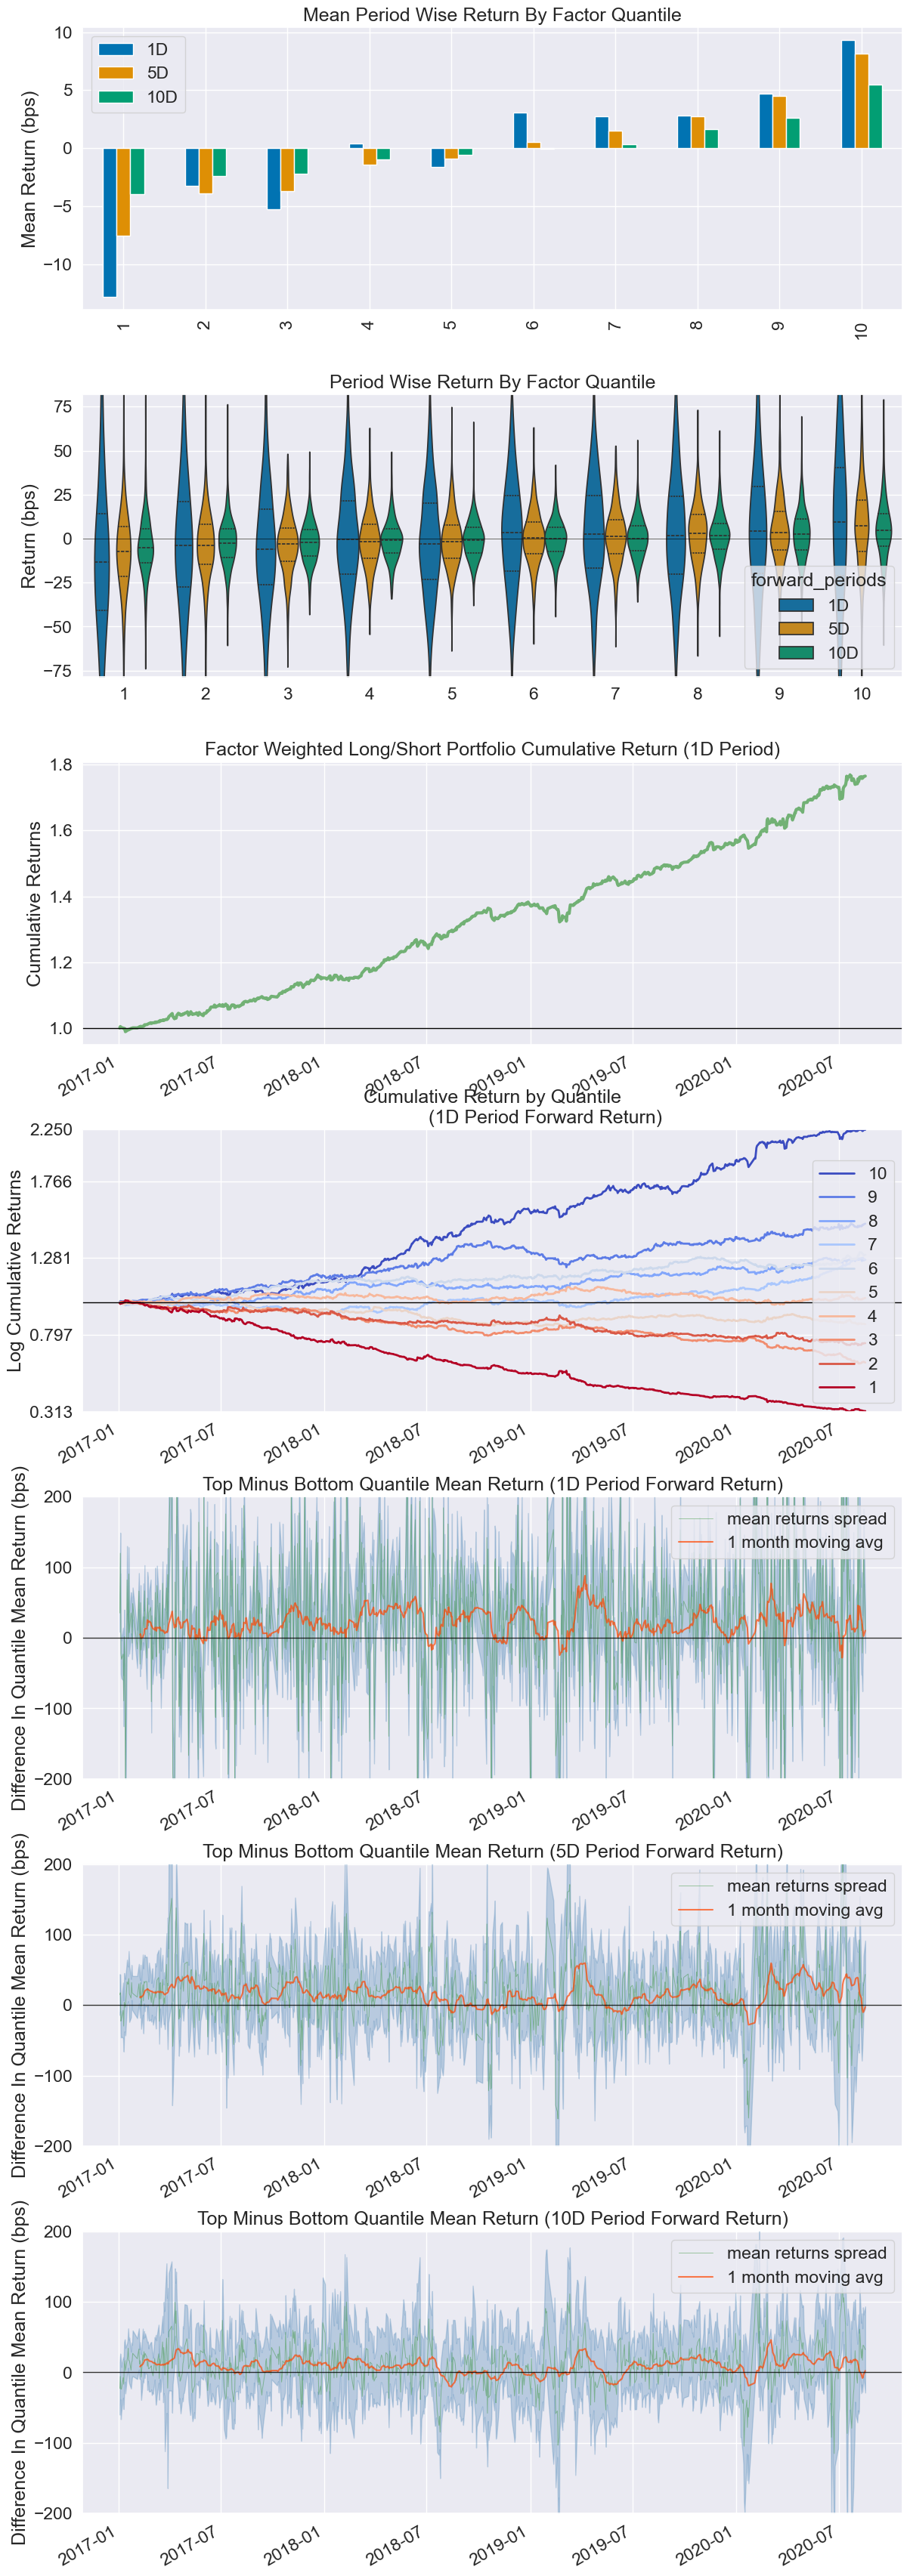

Information Analysis


1D      5D     10D
IC Mean            0.048   0.052   0.044
IC Std.            0.136   0.135   0.130
Risk-Adjusted IC   0.352   0.388   0.338
t-stat(IC)        10.453  11.532  10.033
p-value(IC)        0.000   0.000   0.000
IC Skew            0.034   0.160   0.118
IC Kurtosis        0.205   0.411   0.542

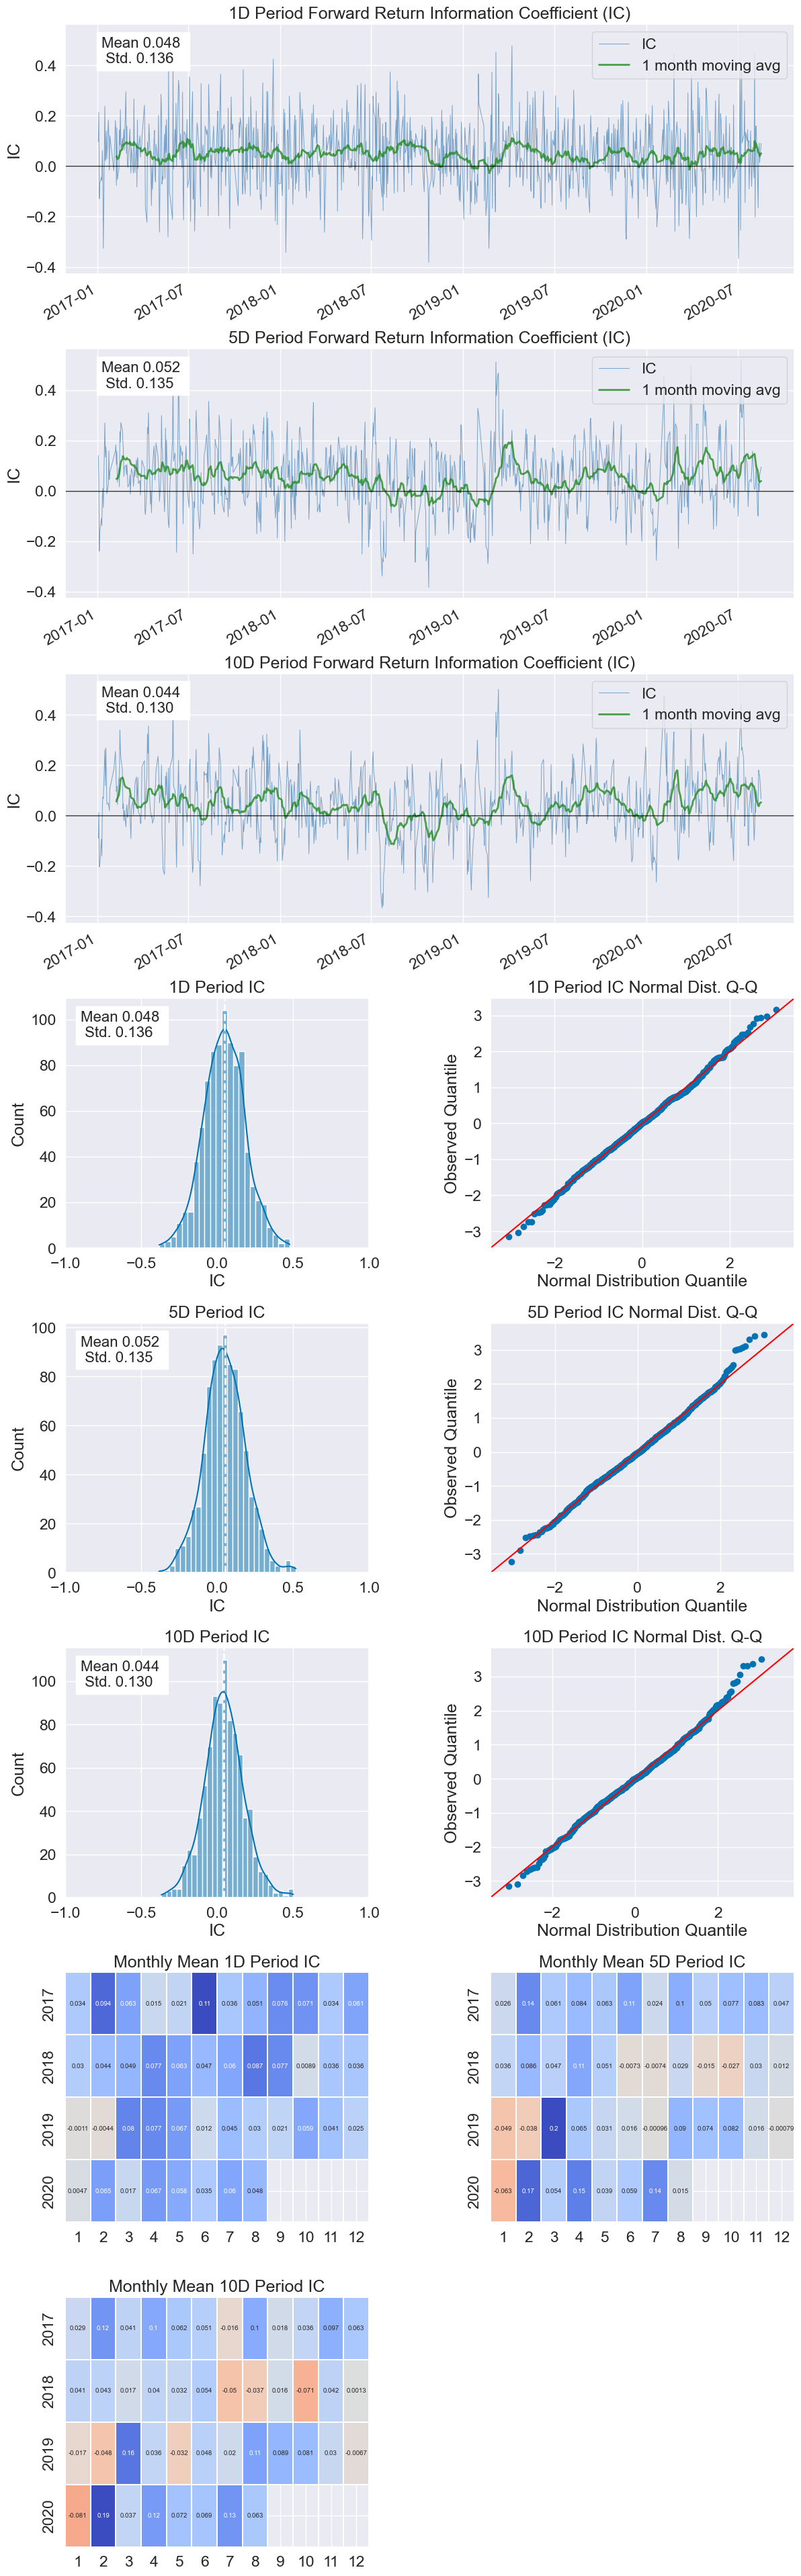

C:\Users\11986\AppData\Roaming\Python\Python312\site-packages\alphalens\utils.py:928: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


1D     5D    10D
Quantile 1 Mean Turnover    0.585  0.816  0.843
Quantile 2 Mean Turnover    0.797  0.884  0.891
Quantile 3 Mean Turnover    0.846  0.894  0.897
Quantile 4 Mean Turnover    0.858  0.899  0.895
Quantile 5 Mean Turnover    0.866  0.894  0.900
Quantile 6 Mean Turnover    0.867  0.898  0.900
Quantile 7 Mean Turnover    0.859  0.895  0.894
Quantile 8 Mean Turnover    0.835  0.887  0.894
Quantile 9 Mean Turnover    0.794  0.882  0.883
Quantile 10 Mean Turnover   0.591  0.827  0.851

1D     5D    10D
Mean Factor Rank Autocorrelation  0.591  0.168  0.112

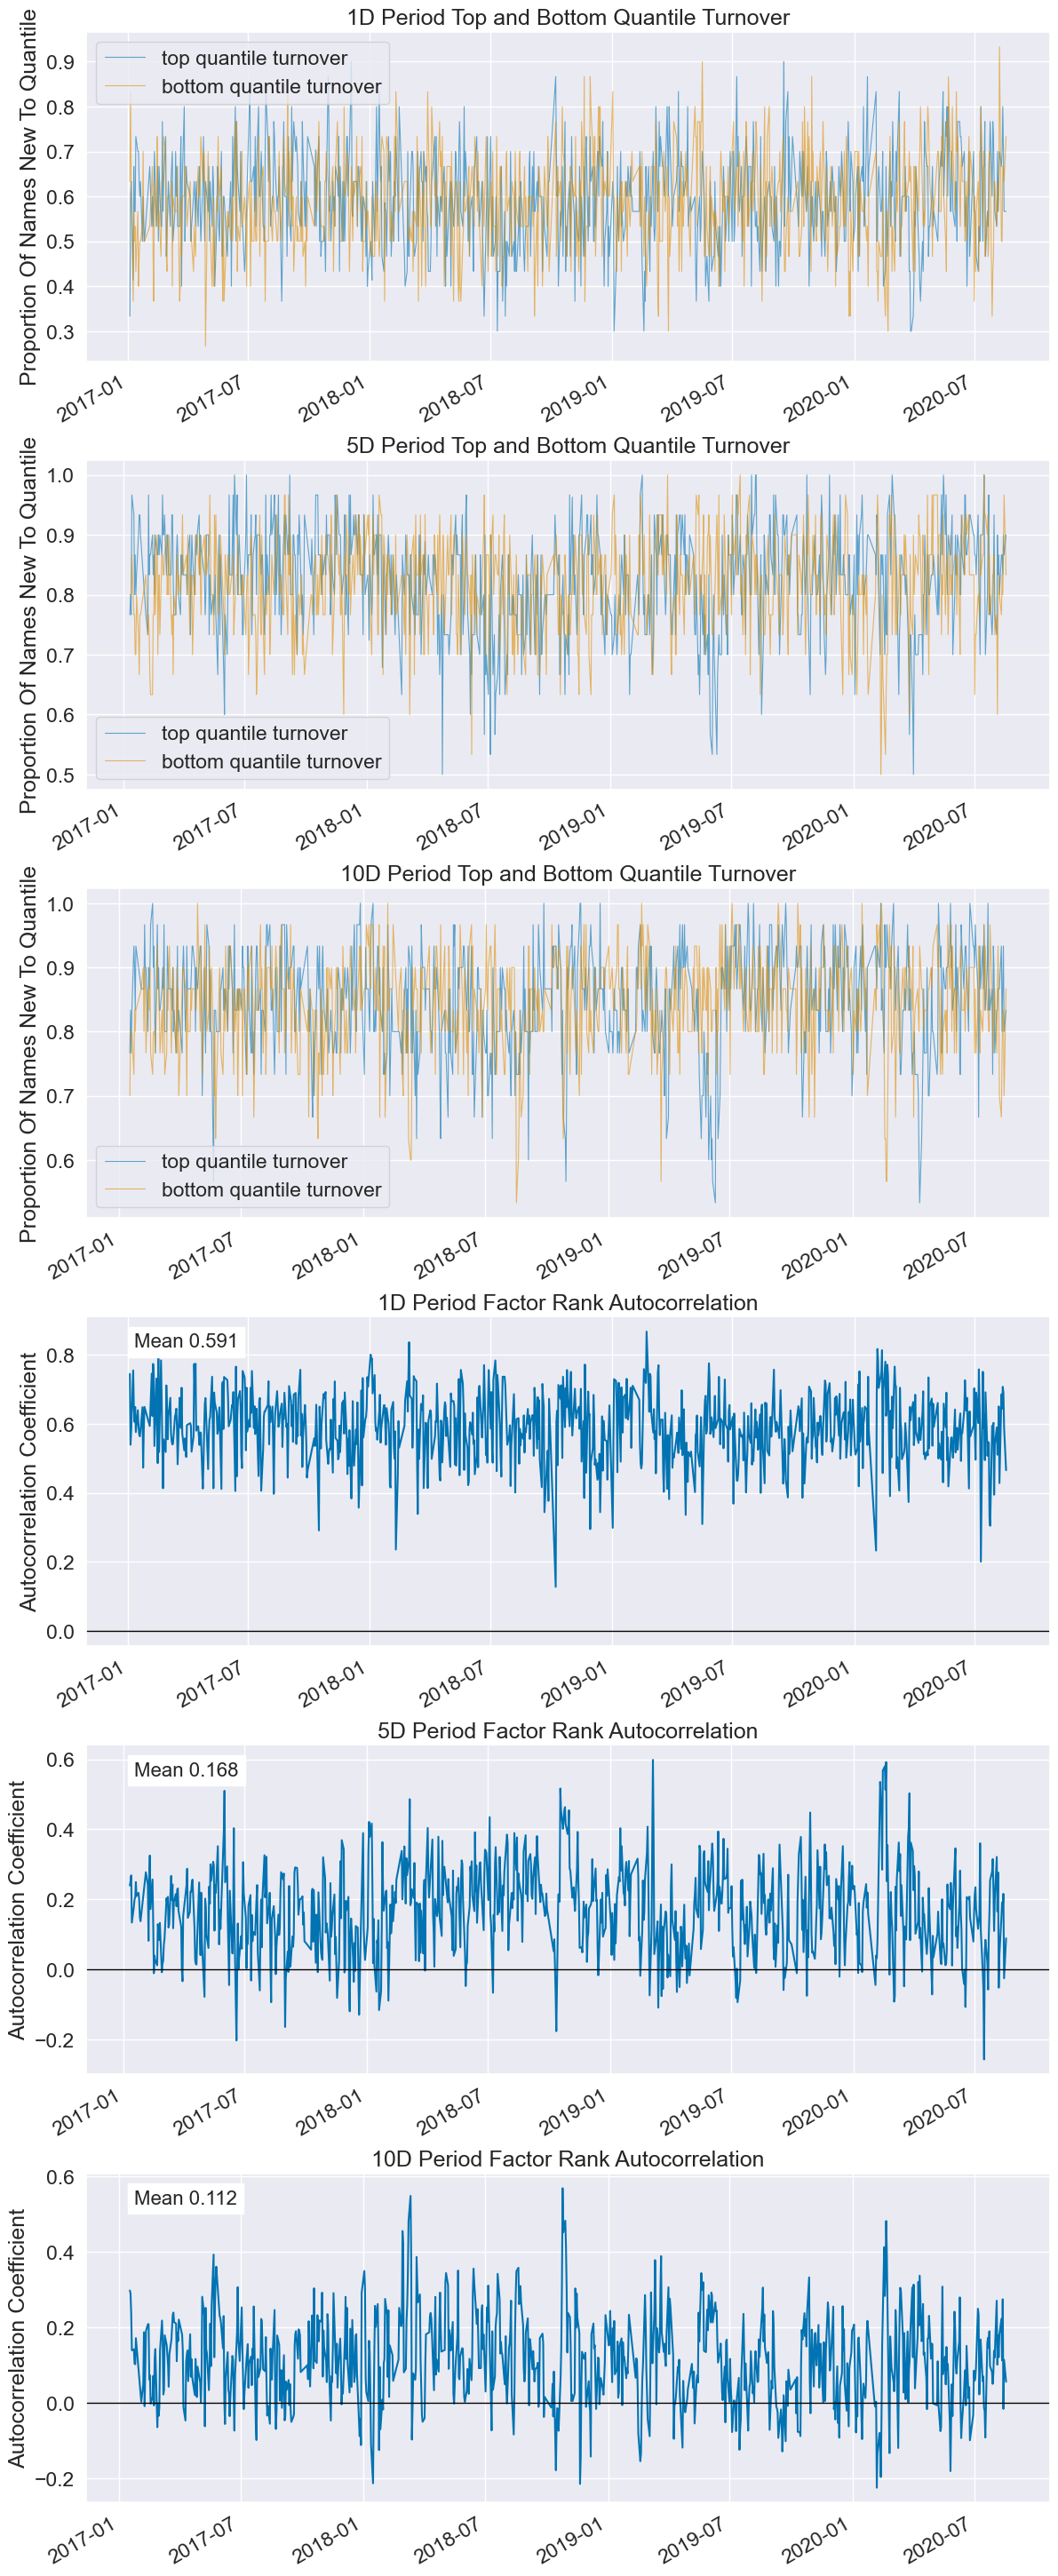

In [22]:
# 检查信号绩效
dataset.show_signal_performance(signal)

In [24]:
# 保存信号数据
lab.save_signal(name, signal)

# 策略回测

In [25]:
# 加载模块
import importlib
from datetime import datetime

from vnpy.alpha.strategy import BacktestingEngine

import vnpy.alpha.strategy.strategies.equity_demo_strategy as equity_demo_strategy

In [26]:
# 重载策略类
importlib.reload(equity_demo_strategy)
EquityDemoStrategy = equity_demo_strategy.EquityDemoStrategy

In [27]:
# 从文件加载信号数据
signal = lab.load_signal(name)

In [28]:
# 创建回测引擎对象
engine = BacktestingEngine(lab)

# 设置回测参数
engine.set_parameters(
    vt_symbols=component_symbols,
    interval=Interval.DAILY,
    start=datetime(2017, 1, 1),
    end=datetime(2020, 8, 1),
    capital=100000000
)

# 添加策略实例
setting = {"top_k": 30, "n_drop": 3, "hold_thresh": 3}
engine.add_strategy(EquityDemoStrategy, setting, signal)

In [29]:
# 执行回测任务
engine.load_data()
engine.run_backtesting()
engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

2025-07-24 23:20:58 开始加载历史数据


100%|██████████| 819/819 [00:05<00:00, 155.22it/s]


2025-07-24 23:21:03 部分合约历史数据为空：['600001.SSE', '600832.SSE', '300979.SZSE', '601299.SSE', '600591.SSE', '600631.SSE', '001289.SZSE', '600905.SSE', '000024.SZSE', '601825.SSE', '600941.SSE', '688041.SSE', '600786.SSE', '601995.SSE', '605499.SSE', '605117.SSE', '000527.SZSE', '301269.SZSE', '600357.SSE', '300888.SZSE', '300999.SZSE', '688223.SSE', '601268.SSE', '300919.SZSE', '300866.SZSE', '688271.SSE', '601059.SSE', '688303.SSE', '601728.SSE', '601868.SSE', '600938.SSE', '300896.SZSE', '688065.SSE', '688187.SSE', '600087.SSE', '600102.SSE', '300957.SZSE', '000562.SZSE']
2025-07-24 23:21:03 所有历史数据加载完成
2025-07-24 23:21:03 策略初始化完成
2025-07-24 23:21:03 开始回放历史数据
2025-07-24 23:21:07 历史数据回放结束
2025-07-24 23:21:07 开始计算逐日盯市盈亏
2025-07-24 23:21:08 逐日盯市盈亏计算完成
2025-07-24 23:21:08 开始计算策略统计指标
2025-07-24 23:21:08 ------------------------------
2025-07-24 23:21:08 首个交易日：  2017-01-03
2025-07-24 23:21:08 最后交易日：  2020-07-31
2025-07-24 23:21:08 总交易日：  871
2025-07-24 23:21:08 盈利交易日：  477
2025-07-24 23:21:08 亏损

In [31]:
# 显示超额收益分析结果
engine.show_performance(benchmark_symbol=index_symbol)